In [7]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [28]:
Norm_dist = sts.norm(0, 1)
Gamma_dist = sts.gamma(1, 1)
R_dist = sts.uniform(1)
Pois_dist = sts.poisson(1)
Bin_dist = sts.binom(100, 0.5)
Geom_dist = sts.geom(0.5)
Beta_dist = sts.beta(1, 1)
Pareto_dist = sts.pareto(1)
Cauchy_dist = sts.cauchy(1)
class new_dist_gen(sts.rv_continuous):
    def __init__(self, theta, name='dist'):
        self.theta = theta
    def _pdf(self, x):
        return 2 * self.theta**2 / (x**3) * (x > self.theta)
New_dist_dist = new_dist_gen(theta=2, name='dist')
class offset_exp(sts.rv_continuous):
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    def _pdf(self, x):
        return 1/self.alpha * math.exp((self.beta - x) / self.alpha) * (x >= self.beta)
Off_exp_dist = offset_exp(1, 1)

In [84]:
N = 10 ** 4
Norm = np.array(Norm_dist.rvs(N))
Gamma = np.array(Gamma_dist.rvs(N))
R = np.array(R_dist.rvs(N))
Pois = np.array(Pois_dist.rvs(N))
Bin = np.array(Bin_dist.rvs(N))
Geom = np.array(Geom_dist.rvs(N))
Beta = np.array(Beta_dist.rvs(N))
Pareto = np.array(Pareto_dist.rvs(N))
Cauchy = np.array(Cauchy_dist.rvs(N))
#New_dist = np.array(New_dist_dist.rvs(size=N))
#Off_exp = np.array(Off_exp_dist.rvs(size=N))
K = 100

In [85]:
def Dispersion(x):
    X = np.array(x) 
    return np.mean(X**2) - np.mean(X)**2

N(0, 1)

In [86]:
a = 0
sigma2 = 1
Norm_dist = sts.norm(a, sigma2)
Norm = np.array(Norm_dist.rvs(N))
# ext -- метод оценок
a_est = [np.mean(Norm[:n]) for n in range(1, N + 1)]
sigma2_est = [Dispersion(Norm[:n]) for n in range(1,N + 1)]
# like - метод максимального правдоподобия
a_like = [np.mean(Norm[:n]) for n in range(1, N + 1)]

Параметрический бутстеп

Нормальное распределение с параметрами a = 0.00, sigma^2 = 1.00


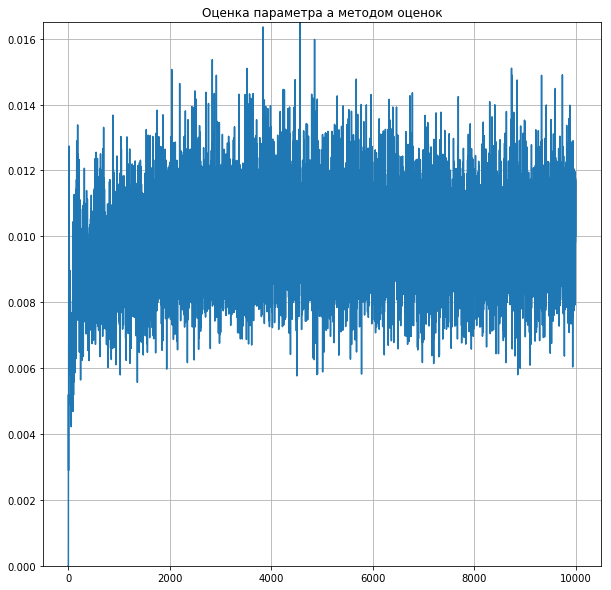

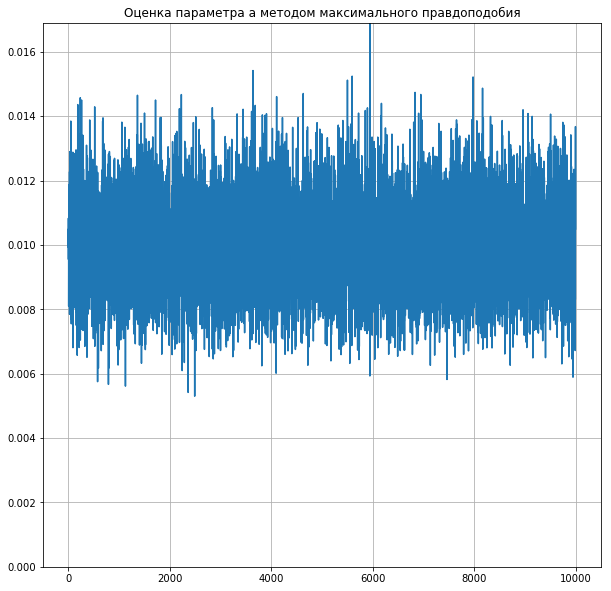

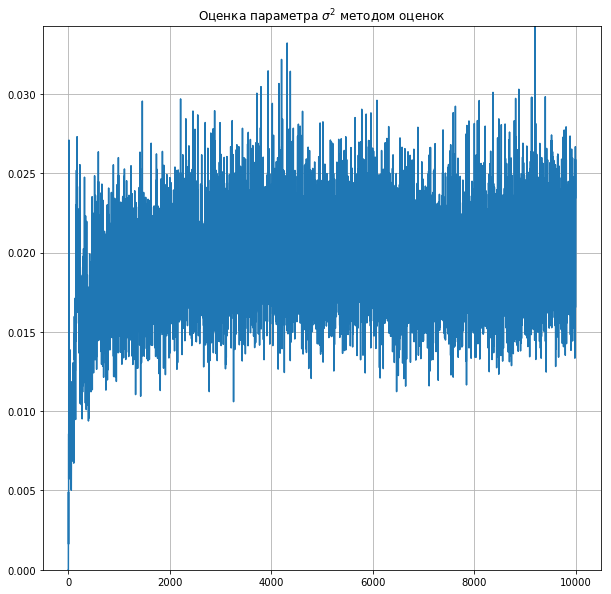



Нормальное распределение с параметрами a = 2.00, sigma^2 = 5.00


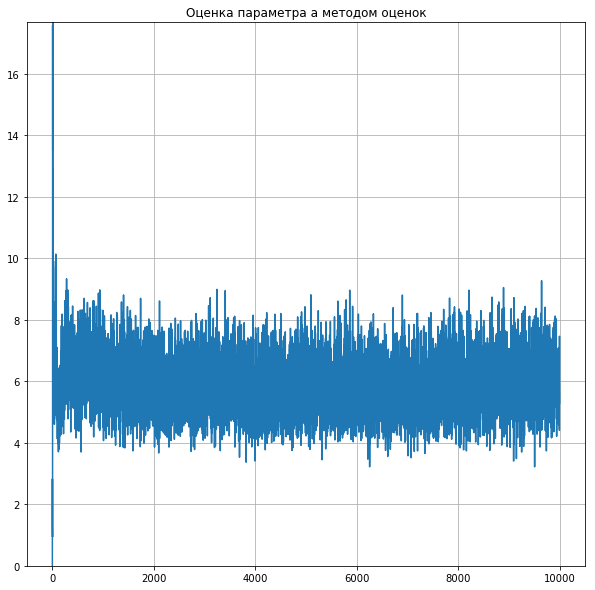

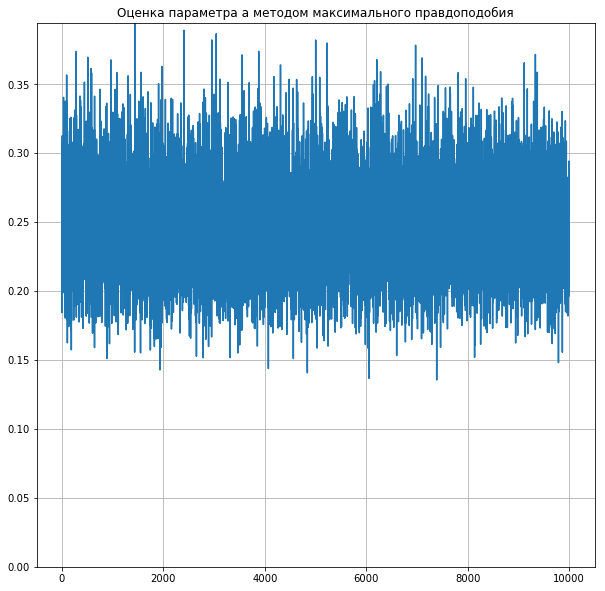

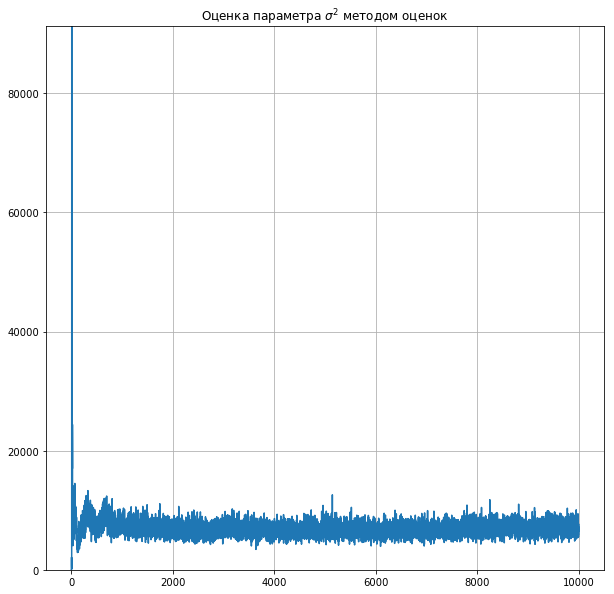



Нормальное распределение с параметрами a = 5.00, sigma^2 = 8.00


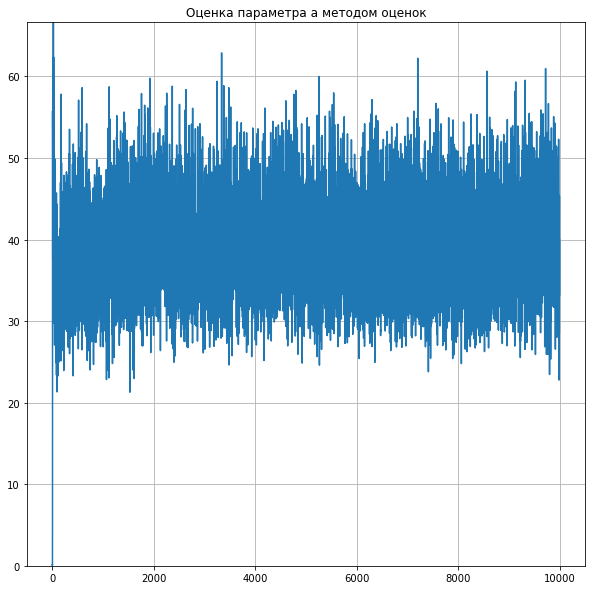

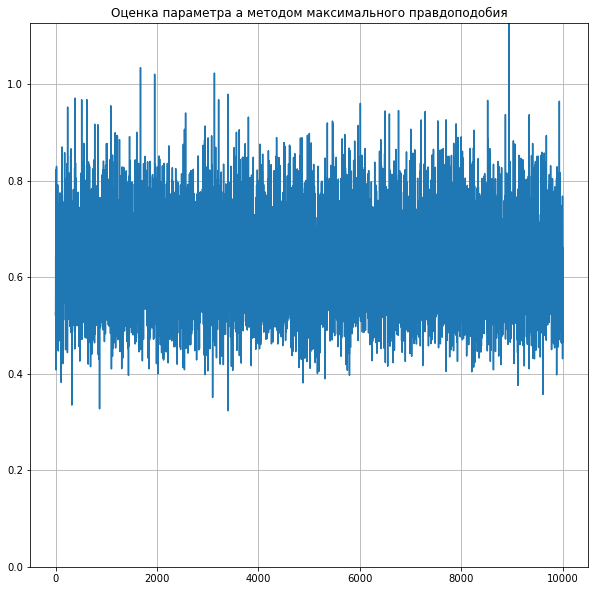

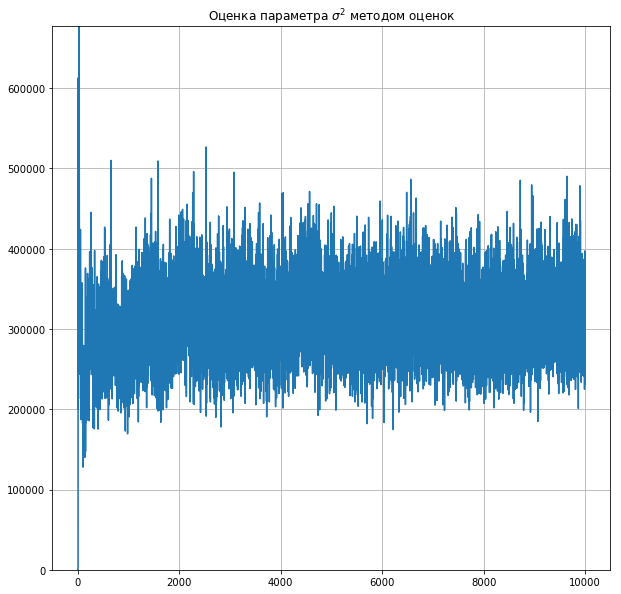

In [118]:
Theta = ((0, 1), (2, 5), (5, 8))
for th in Theta:
    (a, sigma2) = th
    Norm_dist = sts.norm(a, sigma2)
    Norm = np.array(Norm_dist.rvs(N))
    # ext -- метод оценок
    a_est = [np.mean(Norm[:n]) for n in range(1, N + 1)]
    sigma2_est = [Dispersion(Norm[:n]) for n in range(1,N + 1)]
    # like -- метод максимального правдоподобия
    a_like = [np.mean(Norm[:n]) for n in range(1, N + 1)]
    
    disp_a_est = []
    disp_sigma2_est = []
    disp_a_like = []
    
    for n in range(N):
        A_est = []
        Sigma2_est = []
        A_like = []
        Norm_est_dist = sts.norm(a_est[n], sigma2_est[n])
        Norm_like_dist = sts.norm(a_like[n], sigma2)
        for i in range(K):
            Norm_est = Norm_est_dist.rvs(K)
            A_est.append(np.mean(Norm_est))
            Sigma2_est.append(Dispersion(Norm_est))

            Norm_like = Norm_like_dist.rvs(K)
            A_like.append(np.mean(Norm_like))

        disp_a_est.append(Dispersion(A_est))
        disp_sigma2_est.append(Dispersion(Sigma2_est))
        disp_a_like.append(Dispersion(A_like))  
    
    X = np.array(range(N))
    print("Нормальное распределение с параметрами a = %.2f, sigma^2 = %.2f" %(a, sigma2))
    plt.figure(figsize=(10,10))
    plt.subplot()
    plt.ylim((0, np.amax(disp_a_est)))
    plt.title("Оценка параметра a методом оценок")
    plt.plot(X, disp_a_est)
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.subplot()
    plt.ylim((0, np.amax(disp_a_like)))
    plt.title("Оценка параметра a методом максимального правдоподобия")
    plt.plot(X, disp_a_like)
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.subplot()
    plt.ylim((0, np.amax(disp_sigma2_est)))
    plt.title("Оценка параметра $\\sigma^2$ методом оценок")
    plt.plot(X, disp_sigma2_est)
    plt.grid()
    plt.show()
    print('\n')

In [108]:
(a, sigma2) = (0,1)
print("Нормальное распределение с параметрами a = %.2f, sigma^2 = %.2f" %(a, sigma2))

Нормальное распределение с параметрами a = 0.00, sigma^2 = 1.00


Непараметрический бутстеп

In [79]:
A_est = []
Sigma2_est = []
A_like = []
R_d = sts.randint(1, N)
for i in range(K):
    I = R_d.rvs(K)
    Norm_non = [Norm[i] for i in I]
    A_est.append(np.mean(Norm_non))
    Sigma2_est.append(Dispersion(Norm_non))
    A_like.append(np.mean(Norm_non))

In [80]:
disp1_a_est = Dispersion(A_est)
disp1_sigma2_est = Dispersion(Sigma2_est)
disp1_a_like = Dispersion(A_like)

In [93]:
Theta = [1, 5, 10]
for th in Theta:
    for F_dist in (Pois_dist, R_dist, Geom_dist, Pareto_dist, Cauchy_dist):
        if dist == Geom_dist:
            th = 1 / th
        dist = np.array(F_dist.rvs(N))
        # ext -- метод оценок
        val_est = [np.mean(Norm[:n]) for n in range(1, N + 1)]
        sigma2_est = [Dispersion(Norm[:n]) for n in range(1,N + 1)]
        # like - метод максимального правдоподобия
        a_like = [np.mean(Norm[:n]) for n in range(1, N + 1)]